<h4>PROJECT :  CHRONIC KIDNEY DISEASE ANALYSIS</h4>

<h4>AUTHOR  :  PREETHI P </h4>

**PROJECT WORKFLOW**

#### 1. Data Collection

             The dataset is collected from Kaggle: 
             https://www.kaggle.com/mansoordaku/ckdisease
             
    
#### 2. Data Pre-Processing
            
            1. Dimensionality reduction.
            2. Feature selection.
            3. Cleaning individual columns.
            4. Replacing NaN values and outliers
            5. Some Transformations

#### 3. Exploratory Data Analysis
            
             1. Univariate Analysis
             2. Bivariate Analysis


#### 6. Machine learning Models

            * Classification

                1. Logistic regression
                2. Random forest classifier
                3. Decision tree classifier
                4. K Nearest Neighbor
                5. Support Vector Machine

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Reading data**

In [119]:
import pandas as pd
import numpy as np
from tkinter import *

import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as px
import seaborn as sns

# Machine Learning
from sklearn.metrics import accuracy_score

#Feature selection
from sklearn.ensemble import ExtraTreesClassifier

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Finding the best model
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

#from sklearn.model_selection import cross_val_score

In [120]:
%matplotlib inline

**Feature Details
Attribute Information:**

We use 24 + class = 25 ( 11 numeric ,14 nominal)

Age(numerical) - age in years

Blood Pressure(numerical) - bp in mm/Hg

Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)

Albumin(nominal) - al - (0,1,2,3,4,5)

Sugar(nominal) - su - (0,1,2,3,4,5)

Red Blood Cells(nominal) - rbc - (normal,abnormal)

Pus Cell (nominal) - pc - (normal,abnormal)    

Pus Cell clumps(nominal) - pcc - (present,notpresent)

Bacteria(nominal) - ba - (present,notpresent)

Blood Glucose Random(numerical) - bgr in mgs/dl

Blood Urea(numerical) -bu in mgs/dl

Serum Creatinine(numerical) - sc in mgs/dl

Sodium(numerical) - sod in mEq/L

Potassium(numerical) - pot in mEq/L

Hemoglobin(numerical) - hemo in gms

Packed Cell Volume(numerical) - pcv

White Blood Cell Count(numerical) - wc in cells/cumm

Red Blood Cell Count(numerical) - rc in millions/cmm

Hypertension(nominal) - htn - (yes,no)

Diabetes Mellitus(nominal) - dm - (yes,no)

Coronary Artery Disease(nominal) - cad - (yes,no)

Appetite(nominal) - appet - (good,poor)

Pedal Edema(nominal) - pe - (yes,no)

Anemia(nominal) - ane - (yes,no)

Class (nominal)- class - (ckd,notckd)

In [121]:
df = pd.read_csv('Kidney_disease.csv')

In [122]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

**DATA PREPROCESSING**

In [124]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

**Most of the features have null values, so the code needs to be preprocessed.**

In [125]:
feature_na = [i for i in df.columns if df[i].isnull().sum()>0]
feature_na

['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [126]:
df[feature_na].head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44,7800,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38,6000,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31,7500,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32,6700,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35,7300,4.6,no,no,no,good,no,no


In [127]:
rows,columns = df.shape

In [128]:
#Percentage of null values for features

for i in feature_na:
    print('{} has {} % null values'.format(i,round(df[i].isna().sum()/rows*100,3)))

age has 2.25 % null values
bp has 3.0 % null values
sg has 11.75 % null values
al has 11.5 % null values
su has 12.25 % null values
rbc has 38.0 % null values
pc has 16.25 % null values
pcc has 1.0 % null values
ba has 1.0 % null values
bgr has 11.0 % null values
bu has 4.75 % null values
sc has 4.25 % null values
sod has 21.75 % null values
pot has 22.0 % null values
hemo has 13.0 % null values
pcv has 17.5 % null values
wc has 26.25 % null values
rc has 32.5 % null values
htn has 0.5 % null values
dm has 0.5 % null values
cad has 0.5 % null values
appet has 0.25 % null values
pe has 0.25 % null values
ane has 0.25 % null values


**#inference**<br>
More number of null values - rbc, rc, wc, sod, pot<br>
Less number of null values - htn, dm, cad, pcc, ba

In [129]:
style.use('seaborn-darkgrid')

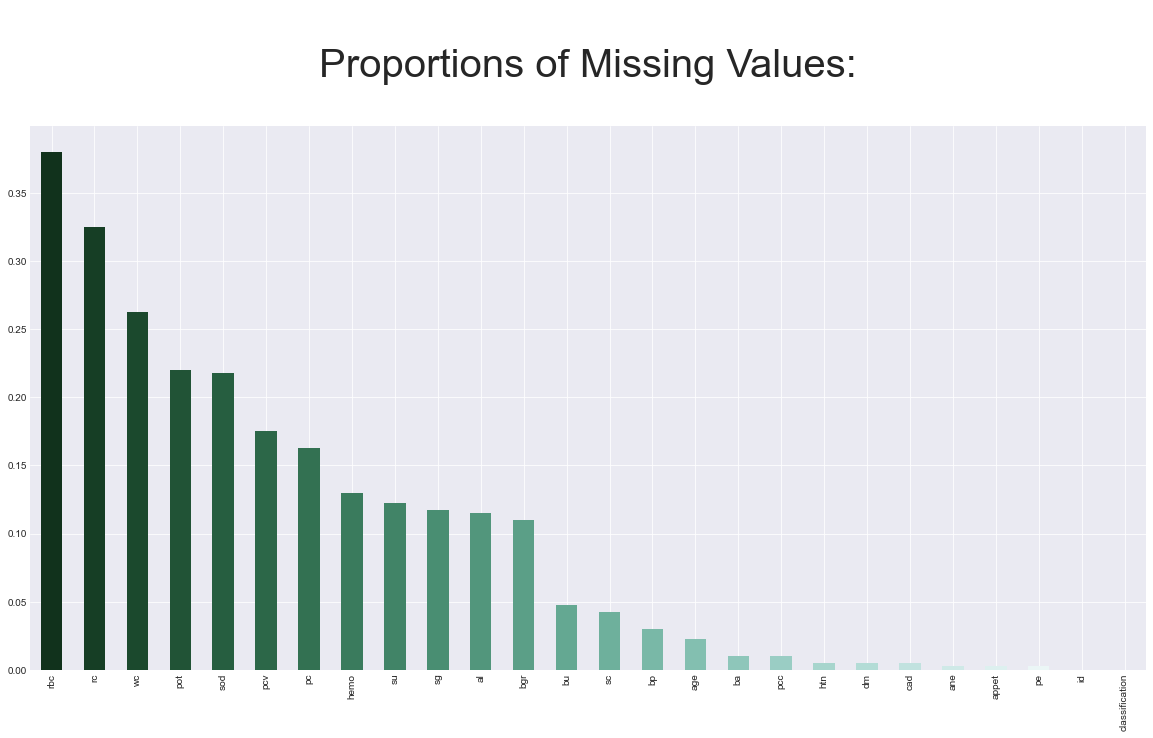

In [130]:
d=((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

In [131]:
#Dropping id column

df.drop('id',axis=1,inplace=True)

In [132]:
#numerical columns

a = [i for i in df.columns if (df[i].dtypes!='object') and (i in feature_na)]
a

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [133]:
#categorical columns

b = [i for i in feature_na if i not in a]
b

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [134]:
#Since index 2 to 5 of variable a has to be filled with another central tendency

del a[2:5]

In [135]:
#Replacing the null values of numerical columns with mean value

for i in a:
    temp = round(df[i].mean(),3)
    df[i].replace(np.nan,temp,inplace=True)

In [136]:
#Replacing the null values of nominal variables with mode value

for i in ['sg','al','su']:
    temp = df[i].mode()
    df[i].fillna(value=temp[0],inplace=True)

In [137]:
## Checking for null values after pre-processing

print("Numerical columns :")
for i in a:
    print("Null values in",i,"is",(df[i].isnull().sum()))

Numerical columns :
Null values in age is 0
Null values in bp is 0
Null values in bgr is 0
Null values in bu is 0
Null values in sc is 0
Null values in sod is 0
Null values in pot is 0
Null values in hemo is 0


In [138]:
df[b].head()

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no


In [139]:
#function for conversion of object to float and filling with mean
def obj_num(b):
    df[b] = df[b].astype(float)
    ans = round(df[b].mean(),3)
    df[b] = df[b].replace([np.nan,0],ans)
    df[b].unique()

In [140]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [141]:
df['pcv'].replace('\t43',43,inplace=True)

In [142]:
df['pcv'].replace('\t?',0,inplace=True)

In [143]:
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [144]:
df['rc'].replace('\t?',0,inplace=True)

In [145]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [146]:
df['wc'].replace('\t?',0,inplace=True)

In [147]:
df['wc'].replace('\t8400',8400,inplace=True)

In [148]:
df['wc'].replace('\t6200',6200,inplace=True)

In [149]:
for i in ['pcv','rc','wc']:
    obj_num(i)

In [150]:
df['rc'].unique()

array([5.2 , 4.69, 3.9 , 4.6 , 4.4 , 5.  , 4.  , 3.7 , 3.8 , 3.4 , 2.6 ,
       2.8 , 4.3 , 3.2 , 3.6 , 4.1 , 4.9 , 2.5 , 4.2 , 4.5 , 3.1 , 4.7 ,
       3.5 , 6.  , 2.1 , 5.6 , 2.3 , 2.9 , 2.7 , 8.  , 3.3 , 3.  , 2.4 ,
       4.8 , 5.4 , 6.1 , 6.2 , 6.3 , 5.1 , 5.8 , 5.5 , 5.3 , 6.4 , 5.7 ,
       5.9 , 6.5 ])

In [151]:
df['wc'].unique()

array([ 7800.   ,  6000.   ,  7500.   ,  6700.   ,  7300.   ,  8377.627,
        6900.   ,  9600.   , 12100.   ,  4500.   , 12200.   , 11000.   ,
        3800.   , 11400.   ,  5300.   ,  9200.   ,  6200.   ,  8300.   ,
        8400.   , 10300.   ,  9800.   ,  9100.   ,  7900.   ,  6400.   ,
        8600.   , 18900.   , 21600.   ,  4300.   ,  8500.   , 11300.   ,
        7200.   ,  7700.   , 14600.   ,  6300.   ,  7100.   , 11800.   ,
        9400.   ,  5500.   ,  5800.   , 13200.   , 12500.   ,  5600.   ,
        7000.   , 11900.   , 10400.   , 10700.   , 12700.   ,  6800.   ,
        6500.   , 13600.   , 10200.   ,  9000.   , 14900.   ,  8200.   ,
       15200.   ,  5000.   , 16300.   , 12400.   , 10500.   ,  4200.   ,
        4700.   , 10900.   ,  8100.   ,  9500.   ,  2200.   , 12800.   ,
       11200.   , 19100.   , 12300.   , 16700.   ,  2600.   , 26400.   ,
        8800.   ,  7400.   ,  4900.   ,  8000.   , 12000.   , 15700.   ,
        4100.   ,  5700.   , 11500.   ,  5400.   , 

In [152]:
b

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [153]:
del b[4:7]

In [154]:
b

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [155]:
for i in b:
    print("Unique values in",i,"is",df[i].unique())

Unique values in rbc is [nan 'normal' 'abnormal']
Unique values in pc is ['normal' 'abnormal' nan]
Unique values in pcc is ['notpresent' 'present' nan]
Unique values in ba is ['notpresent' 'present' nan]
Unique values in htn is ['yes' 'no' nan]
Unique values in dm is ['yes' 'no' ' yes' '\tno' '\tyes' nan]
Unique values in cad is ['no' 'yes' '\tno' nan]
Unique values in appet is ['good' 'poor' nan]
Unique values in pe is ['no' 'yes' nan]
Unique values in ane is ['no' 'yes' nan]


In [156]:
df['dm'].replace('\tyes','yes',inplace=True)

In [157]:
df['dm'].replace(' yes','yes',inplace=True)

In [158]:
df['dm'].replace('\tno','no',inplace=True)

In [159]:
df['cad'].replace('\tno','no',inplace=True)

In [160]:
for i in b:
    print('Unique values in',i,"is",df[i].unique())

Unique values in rbc is [nan 'normal' 'abnormal']
Unique values in pc is ['normal' 'abnormal' nan]
Unique values in pcc is ['notpresent' 'present' nan]
Unique values in ba is ['notpresent' 'present' nan]
Unique values in htn is ['yes' 'no' nan]
Unique values in dm is ['yes' 'no' nan]
Unique values in cad is ['no' 'yes' nan]
Unique values in appet is ['good' 'poor' nan]
Unique values in pe is ['no' 'yes' nan]
Unique values in ane is ['no' 'yes' nan]


In [161]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [162]:
df['classification'].replace('ckd\t',0,inplace=True)

In [163]:
#since these columns have null values, we cannot encode it

df.replace({'rbc' : {'normal' : 0, 'abnormal' : 1},
            'pc' : {'normal' : 0, 'abnormal' : 1},
            'pcc' : {'present' : 0, 'notpresent' : 1},
            'ba' : {'present' : 0, 'notpresent' : 1},
            'htn' : {'yes' : 0, 'no' : 1},
            'dm' : {'yes' : 0, 'no' : 1},
            'cad' : {'yes' : 0, 'no' : 1},
            'appet' : {'good' : 0, 'poor' : 1},
            'pe' : {'yes' : 0, 'no' : 1},
            'ane' : {'yes' : 0, 'no' : 1},
            'classification' : {'ckd' : 0, 'notckd' : 1}},
           inplace=True)

In [164]:
for i in b:
    print('Unique values in',i,"is",df[i].unique())

Unique values in rbc is [nan  0.  1.]
Unique values in pc is [ 0.  1. nan]
Unique values in pcc is [ 1.  0. nan]
Unique values in ba is [ 1.  0. nan]
Unique values in htn is [ 0.  1. nan]
Unique values in dm is [ 0.  1. nan]
Unique values in cad is [ 1.  0. nan]
Unique values in appet is [ 0.  1. nan]
Unique values in pe is [ 1.  0. nan]
Unique values in ane is [ 1.  0. nan]


In [165]:
df['classification'].unique()

array([0, 1], dtype=int64)

**Now the NaN values of categorical variables will be predicted and filled with either 0 or 1 using Logistic Regression.**

In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
df_1 = df.copy()

In [168]:
df_1.drop('classification',axis=1,inplace=True)

In [169]:
for col in b:
    fill_X_train = df_1[df_1[col].isna()==False]
    fill_X_train.drop(b,axis=1,inplace=True)
    
    fill_X_test = df_1[df_1[col].isna()==True]
    fill_X_test.drop(b,axis=1,inplace=True)
    
    fill_y_train = df[col]
    fill_y_train = fill_y_train[fill_y_train.isnull()==False]
    
    lr = LogisticRegression()
    lr.fit(fill_X_train,fill_y_train)
    
    pred = lr.predict(fill_X_test)
    
    d = df[df[col].isna()==True]
    d[col] = pred
    
    e = df[df[col].isna()==False]
    df = pd.concat([d,e],axis=0)

In [170]:
for i in b:
    print(df[i].isna().sum())

0
0
0
0
0
0
0
0
0
0


In [171]:
# To check for the duplicated values

df.duplicated().sum()

0

In [172]:
# To check for the negative values

df[df<0].sum()

age               0.0
bp                0.0
sg                0.0
al                0.0
su                0.0
rbc               0.0
pc                0.0
pcc               0.0
ba                0.0
bgr               0.0
bu                0.0
sc                0.0
sod               0.0
pot               0.0
hemo              0.0
pcv               0.0
wc                0.0
rc                0.0
htn               0.0
dm                0.0
cad               0.0
appet             0.0
pe                0.0
ane               0.0
classification    0.0
dtype: float64

In [173]:
a

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [174]:
a.extend(['rc','pcv','wc'])

In [175]:
print(a)

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'rc', 'pcv', 'wc']


In [176]:
f = ['age', 'bp', 'sc', 'sod', 'pot', 'hemo', 'rc', 'pcv']

In [177]:
# To Check for the presence of outliers using boxplots

fig = px.box(df[f], y=f)
fig.show()

In [178]:
fig1 = px.box(df['wc'],y='wc')
fig1.show()

In [179]:
fig1 = px.box(df['bgr'],y='bgr')
fig1.show()

In [180]:
fig1 = px.box(df['bu'],y='bu')
fig1.show()

In [181]:
## Replacing the null values with interquartile range

def IQR_1(col):

    Q1 = np.percentile(df[col], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(df[col], 75,
                       interpolation = 'midpoint')
    
    per_95 = np.percentile(df[col], 95,
                       interpolation = 'midpoint')
    
    IQR = Q3 - Q1
    
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    df[col] = np.where(df[col] > upper, per_95, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])

    return df

for col in a:
    df = IQR_1(col)

In [182]:
#After cleaning outliers with IQR

fig = px.box(df[f], y=f)
fig.show()    

In [183]:
fig = px.box(df['wc'],y='wc')
fig.show()

In [184]:
g = ['bgr','bu']

In [185]:
fig = px.box(df[g],y=g)
fig.show()

In [186]:
#Let's dig deep and check furthermore to clean the outliers

h = ['bp','sc','rc','bu','bgr']

In [187]:
#z-score

def z_score1(i):
    df['z_s'] = (df[i] - df[i].mean())/df[i].std()
    df[i] = np.where(df['z_s'] < -2, df[i].min() , df[i])
    df[i] = np.where(df['z_s'] > 2, df[i].max() , df[i])

for i in h:
    z_score1(i)
df.drop(['z_s'],axis=1,inplace=True)

In [188]:
fig = px.box(df[f], y=f)
fig.show()

In [189]:
fig = px.box(df['wc'], y=f)
fig.show()

In [190]:
fig = px.box(df[g], y=f)
fig.show()

<h6>We infer that we got the same few outliers that we got after cleaning with IQR which shows that these outliers are just a little bit away from the central value and would not affect our dataset.</h6>

### Preprocessing overview

**Numerical**<br>

 *Mean* : 'age','bp','bgr','bu','su','sod',pot','hemo','pcv'
 <br>
 *Mode* :  'sg','al','su'
 <br><br>
 **Numerical but in object type**<br>
 *Change to int - mean* : 'rc','wc', 'pcv'
 <br><br>
 **Object**<br>
 Converted to numeric <br>
 *Prediction* : 'rbc','pc','pcc','ba','htn','dm','cad', 'appet', 'pe', 'ane'<br><br>
 
 Dropping unnecessary columns & renaming columns<br>
 
 Checked for duplicate values & correcting outliers<br>
 
 Removal of highly correlated attributes<br>
 
 Replacing null values with interquartile range and z-score<br>
 
 Replacing & checking for negative & duplicate values<br>

In [191]:
#Exploratory analysis

In [192]:
#Renaming column name

df.rename(columns={'classification':'class'},inplace=True)

In [193]:
df.corr(method='pearson')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
age,1.000000,0.158566,-0.165004,0.089935,0.188221,0.033086,0.121351,-0.159487,-0.044903,0.242072,...,-0.221176,0.117818,-0.221602,-0.394891,-0.364727,-0.234555,0.158776,-0.096679,-0.050791,-0.232392
bp,0.158566,1.000000,-0.196742,0.160145,0.165149,0.318497,0.142192,-0.072321,-0.136822,0.175586,...,-0.296023,0.024995,-0.228998,-0.275519,-0.229165,-0.101653,0.156878,-0.039182,-0.207841,-0.310997
sg,-0.165004,-0.196742,1.000000,-0.479962,-0.292053,-0.260355,-0.312020,0.306426,0.231704,-0.350080,...,0.508213,-0.205608,0.484100,0.323643,0.351016,0.135814,-0.230975,0.253803,0.184155,0.659504
al,0.089935,0.160145,-0.479962,1.000000,0.287751,0.352181,0.494628,-0.417868,-0.377935,0.325348,...,-0.476229,0.165483,-0.441518,-0.406057,-0.308101,-0.200957,0.303145,-0.411080,-0.229556,-0.531562
su,0.188221,0.165149,-0.292053,0.287751,1.000000,0.106473,0.158353,-0.168091,-0.119399,0.618407,...,-0.183731,0.177200,-0.175080,-0.254268,-0.430514,-0.229301,0.069216,-0.116442,-0.042464,-0.294555
rbc,0.033086,0.318497,-0.260355,0.352181,0.106473,1.000000,0.308301,-0.120558,-0.136520,0.220172,...,-0.380889,-0.017561,-0.272971,-0.254058,-0.208582,-0.114309,0.171447,-0.175467,-0.183554,-0.334912
pc,0.121351,0.142192,-0.312020,0.494628,0.158353,0.308301,1.000000,-0.475826,-0.300824,0.254451,...,-0.431911,0.059717,-0.391026,-0.295291,-0.212165,-0.167800,0.276907,-0.335989,-0.274383,-0.380238
pcc,-0.159487,-0.072321,0.306426,-0.417868,-0.168091,-0.120558,-0.475826,1.000000,0.275082,-0.179408,...,0.289912,-0.131639,0.271181,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
ba,-0.044903,-0.136822,0.231704,-0.377935,-0.119399,-0.136520,-0.300824,0.275082,1.000000,-0.080875,...,0.191852,-0.091650,0.200800,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871
bgr,0.242072,0.175586,-0.350080,0.325348,0.618407,0.220172,0.254451,-0.179408,-0.080875,1.000000,...,-0.307459,0.150987,-0.294214,-0.406508,-0.529387,-0.228817,0.204984,-0.139193,-0.127182,-0.433051


<AxesSubplot:>

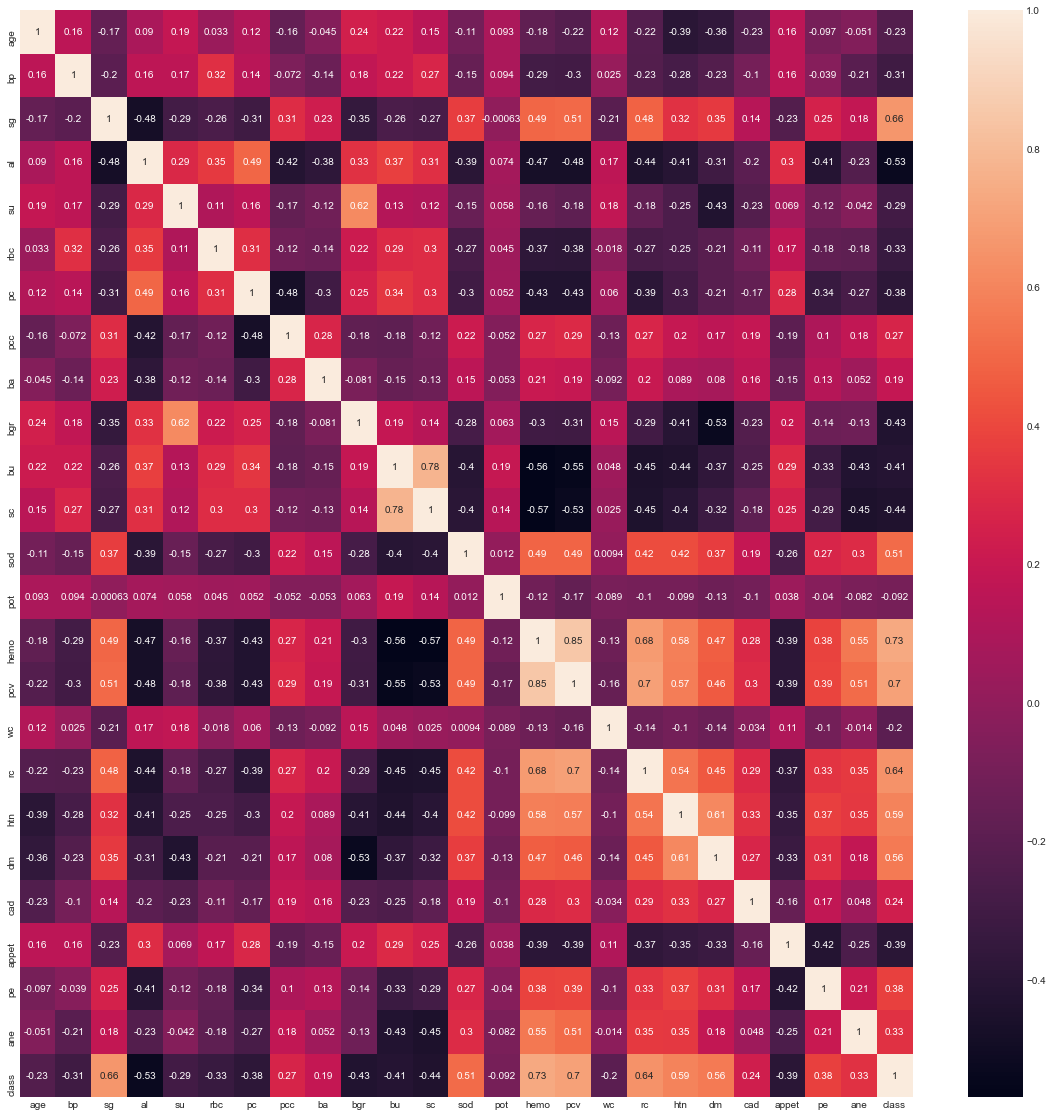

In [194]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(method='pearson'),annot=True)

**Since pcv is highly correlated with hemo; rc with pcv and hemo, they won't provide additional information, so we can remove 'pcv' and 'rc' to avoid complexity and risk of errors**

**'bgr' is highly correlated with 'su', 'bu' with 'sc' and 'htn' with 'dm', let's remove one from all i.e. 'bgr', 'sc' and 'htn'**

In [195]:
df.drop(['rc','pcv'],axis=1,inplace=True)

df.drop(['bgr','sc','htn'],axis=1,inplace=True)

We have removed one correlated attributes from two with more than **0.6**

<AxesSubplot:>

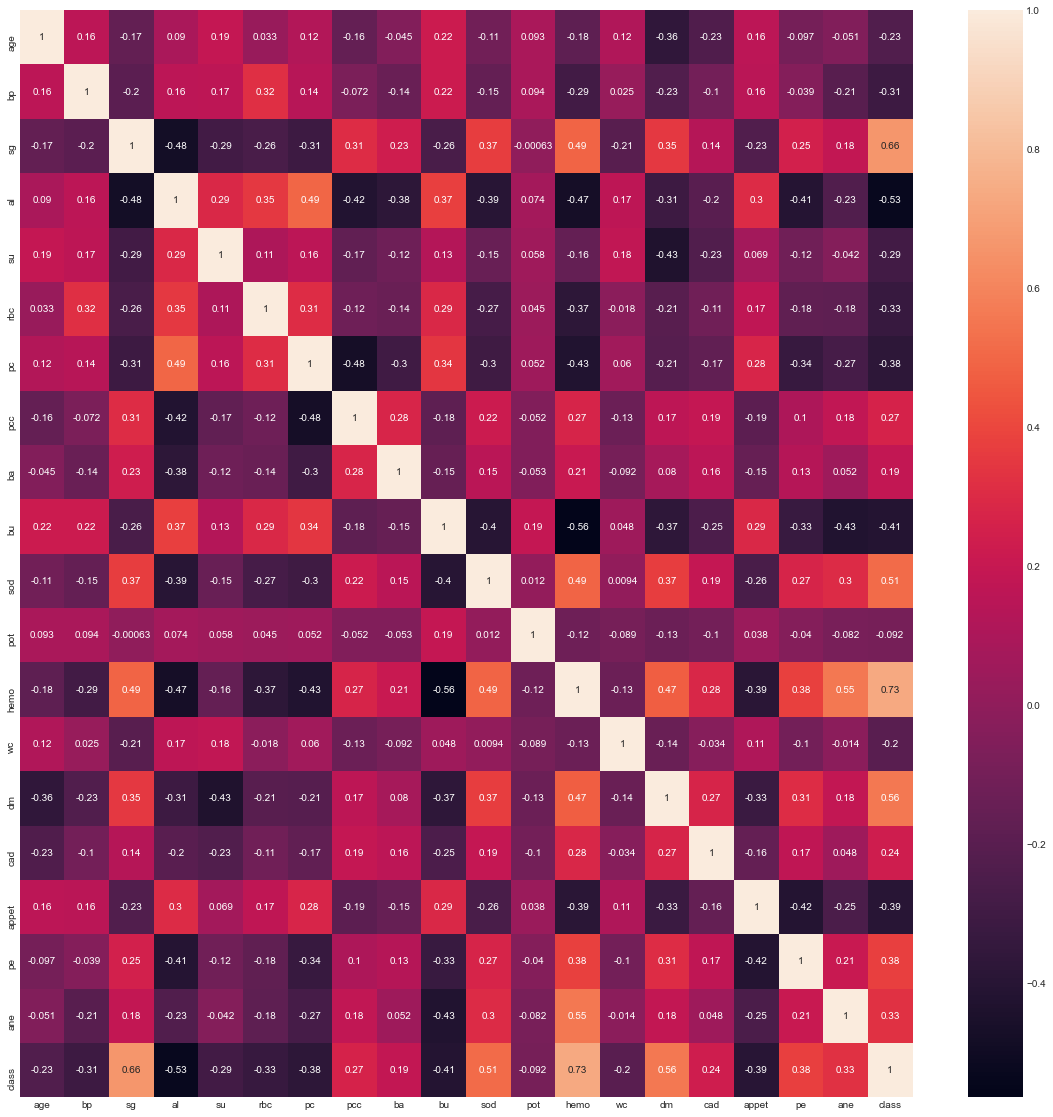

In [196]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(method='pearson'),annot=True)

In [197]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bu,sod,pot,hemo,wc,dm,cad,appet,pe,ane,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.568368,76.106570,1.017712,0.90000,0.395000,0.157500,0.215000,0.895000,0.945000,55.510735,138.107557,4.421440,12.532380,8244.946155,0.65750,0.915000,0.205000,0.810000,0.850000,0.375000
std,16.748313,11.688425,0.005434,1.31313,1.040038,0.364728,0.411337,0.306937,0.228266,40.873474,5.266500,0.619495,2.697772,1976.609861,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,9.000000,55.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,126.000000,2.800000,5.150000,3275.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,27.000000,135.000000,4.000000,10.875000,6975.000000,0.00000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,78.234500,1.020000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,44.000000,137.529000,4.627000,12.526000,8377.627000,1.00000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,0.000000,0.000000,1.000000,1.000000,61.750000,141.000000,4.800000,14.625000,9400.000000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,100.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,160.000000,150.000000,5.900000,17.800000,12800.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'sg'}>,
        <AxesSubplot:title={'center':'al'}>],
       [<AxesSubplot:title={'center':'su'}>,
        <AxesSubplot:title={'center':'rbc'}>,
        <AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'pcc'}>],
       [<AxesSubplot:title={'center':'ba'}>,
        <AxesSubplot:title={'center':'bu'}>,
        <AxesSubplot:title={'center':'sod'}>,
        <AxesSubplot:title={'center':'pot'}>],
       [<AxesSubplot:title={'center':'hemo'}>,
        <AxesSubplot:title={'center':'wc'}>,
        <AxesSubplot:title={'center':'dm'}>,
        <AxesSubplot:title={'center':'cad'}>],
       [<AxesSubplot:title={'center':'appet'}>,
        <AxesSubplot:title={'center':'pe'}>,
        <AxesSubplot:title={'center':'ane'}>,
        <AxesSubplot:title={'center':'class'}>]], dtype=object)

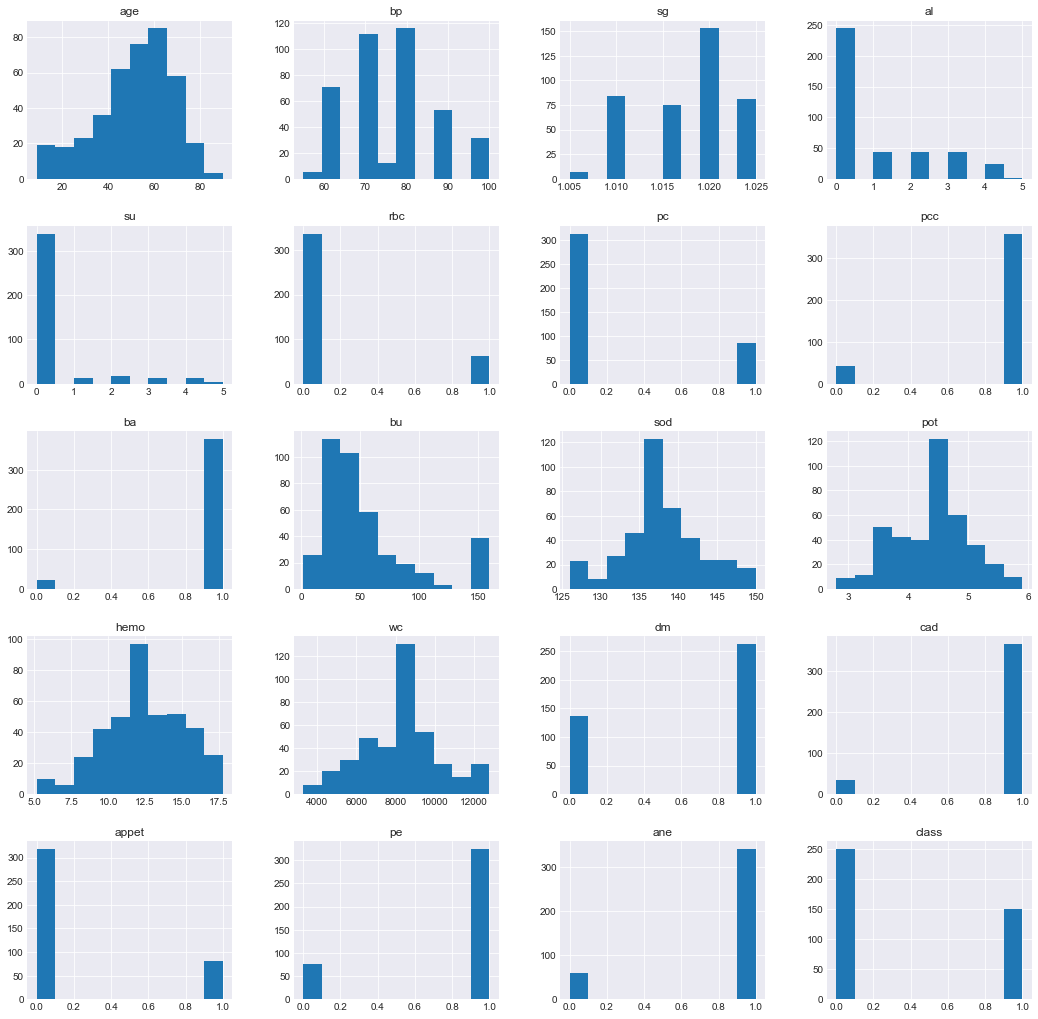

In [198]:
df.hist(figsize=(18,18))

#### Inference

=> THE VALUES RBC , POTTASIUM ,PC AND APPETITE ARE  NORMAL FOR MAXIMUM NUMBER OF PATIENTS.<br>
        => THE PUS CELL CLUMPS AND BACTERIA IS PRESENT IN MAXIMUM NUMBER OF PATIENTS.<br>
        => NEARLY 250 PATIENTS HAVE HYPERTENSION AND BLOOD PRESSURE.<br>
        => THE CORONARY ARTERY DISEASE IS PRESENT IN MAXIMUM NUMBER OF PATIENTS.<br>
                   => NEARLY 350 PATIENTS HAVE PEDAL EDEMA AND ANAEMIA<br>
                   => THE MAXIMUM NUMBER OF PATIENTS ARE PRESENT IN THE AGE GROUP OF 50-70<br>
                   => THE BLOOD PRESSURE VALUE RANGES FROM 50 TO 200 WHERE NEARLY 130 PATIENTS HAVE BP VALUE BETWEEN 80 - 100<br>
                   => THE SODIUM LEVELS ARE HIGH FOR MAXIMUM NUMBER OF PATIENTS WHERE THE VALUE RANGES FROM 100 - 170.<br>
                  => THE BLOOD UREA LEVEL  RANGES FROM 0 - 400 . BUT MAXIMUM NUMBER OF PATIENTS HAVE BLOOD PRESSURE VALUE RANGES BETWEEN 50 TO 100.<br>
                  => THE SC VALUE RANGES BETWEEN 0-9 FOR MAXIMUM NUMBER OF PATIENTS.<br>
                 => THE HEMOGLOBIN VALUE APPROXIMATELY RANGES BETWEEN 3 TO 18<br>
                       THE MAXIMUM NUMBER OF PATIENTS HAVE HEMOGLOBIN VALUE RANGES FROM 12-14<br>
               => THE WC VALUE RANGES FROM 0 10 20000 AND MAXIMUM NUMBER OF PATIENTS HAVE WC VALUE GREATER THAN 10000

In [199]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bu', 'sod',
       'pot', 'hemo', 'wc', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'],
      dtype='object')

##### Relation between the target variable and highly correlated features (with target) 'sg','hemo' and 'dm'

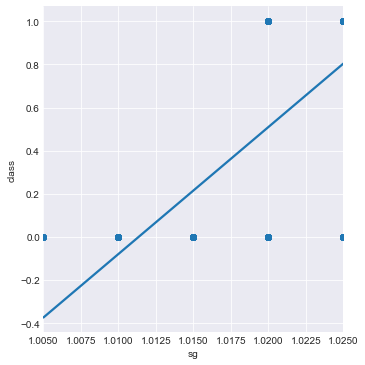

In [200]:
#most correlated attributes with the target
sns.lmplot(x='sg',y='class',ci=None,data=df)

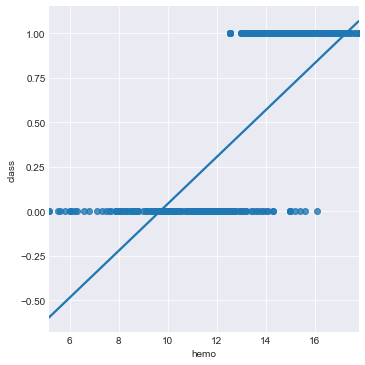

In [201]:
sns.lmplot(x='hemo',y='class',ci=None,data=df)

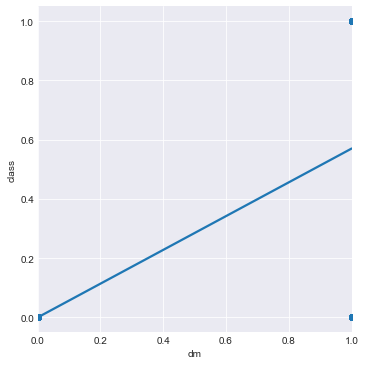

In [202]:
sns.lmplot(x='dm',y='class',ci=None,data=df)

##### Relation between the target variable and less correlated features (with target) 'al','rbc' and 'pc'

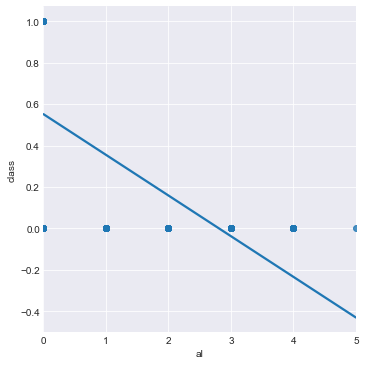

In [203]:
#least correlated columns with target
sns.lmplot(x='al',y='class',ci=None,data=df)

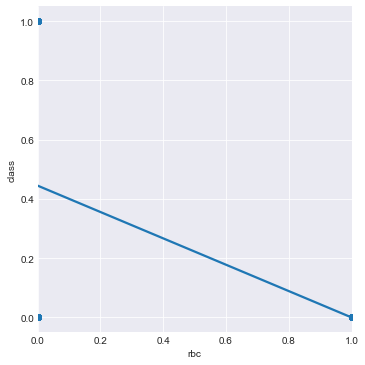

In [204]:
sns.lmplot(x='rbc',y='class',ci=None,data=df)

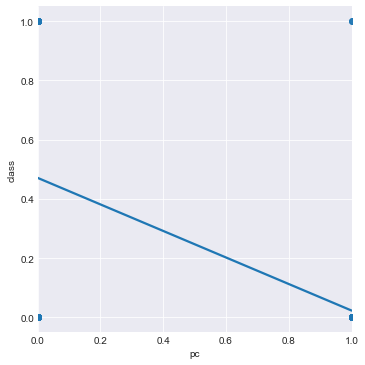

In [205]:
sns.lmplot(x='pc',y='class',ci=None,data=df)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.005'),
  Text(1, 0, '1.01'),
  Text(2, 0, '1.015'),
  Text(3, 0, '1.02'),
  Text(4, 0, '1.025')])

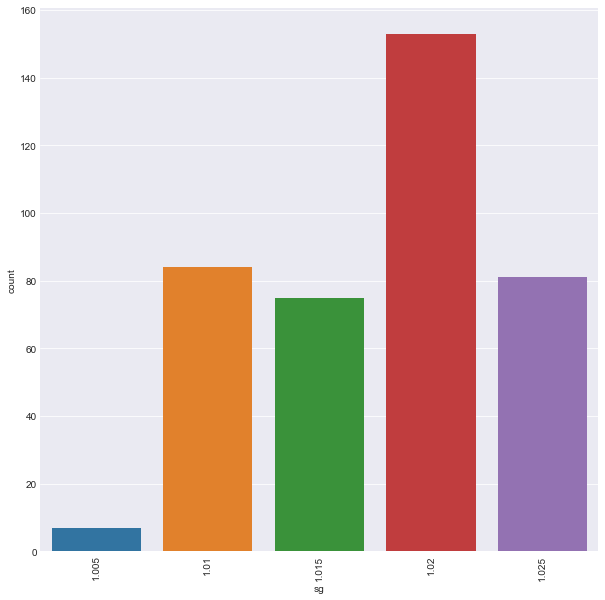

In [206]:
plt.figure(figsize=(10,10))
sns.countplot(x='sg',data=df)
plt.xticks(rotation=90)

We can infer that 1.02 is the specific gravity value that most of the patients have.

In [207]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bu', 'sod',
       'pot', 'hemo', 'wc', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [208]:
b.append('class')
b

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

In [209]:
b.remove('htn')

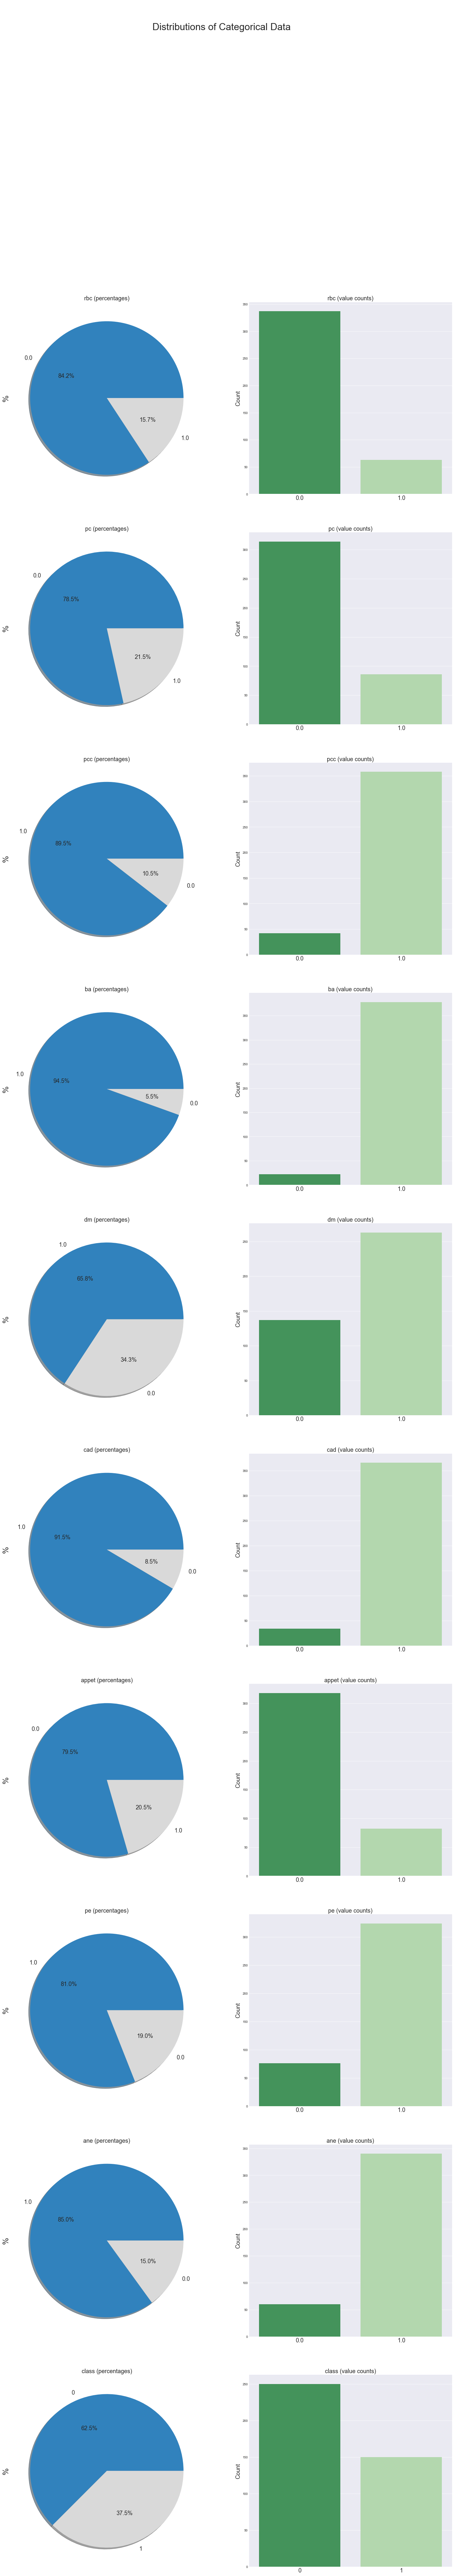

In [210]:
n_rows, n_cols = (10,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 130))
figure.suptitle('\n\nDistributions of Categorical Data', fontsize=30)

for i in range(len(b)):
    column=b[i]
    graph1=df[column].value_counts().plot.pie(autopct='%1.1f%%',
                                                      ax=axes[i,0],
                                                      colormap="tab20c",
                                                      fontsize=18,
                                                      shadow=True)
    axes[i,0].set_ylabel('%',fontsize=25)
    axes[i,0].set_title(column+' (percentages)', fontsize=18)
    graph2=sns.countplot(x=column,
                         data=df,
                         palette='Greens_r',
                         ax=axes[i,1])
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=18)
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels(), fontsize=18)
    axes[i,1].set_title(column+' (value counts)', fontsize=18)

### INFERENCE ABOUT CATEGORICAL PLOT :
<br>
<ul>
<li>MOST NUMBER OF PATIENTS HAVE THE RBC VALUE OF 0 (NORMAL) AND NEARLY 86% OF PATIENTS HAS IT AND LESS NUMBER OF PATIENTS ARE UNAFFECTED.</li><br>
<li>THE PUS CELL VALUE IS NORMAL FOR 79.3% PATIENTS. PUS CELL CLUMPS IS NOT PRESENT FOR 89.5% PATIENTS.</li><br>
<li>THE  BACTERIAL VALUE  IS 1 FOR 94.5% OF PATIENTS HENCE MOST OF THE PATIENTS DON'T HAVE BACTERIA.</li><br>
<li>AROUND 34.3% OF PATIENTS ARE AFFECTED WITH DIABETUS MELLITUS. IT IS SLIGHTLY HIGH.</li><br>
<li>THE CAD VALUE DOESNT HAVE CONSIDERABLE EFFECT ON THE TARGET VARIABLE. ONLY 8.5% PATIENTS ARE AFFECTED.</li><br>
<li>THE APPETITE IS NORMAL FOR 79.5 % OF PATIENTS.</li><br>
<li>81% OF PATIENTS DON'T HAVE PEDAL EDEMA & 85% DON'T HAVE ANAEMIA.</li><br>
<li>62.5% OF PATIENTS ARE AFFECTED.</li><br>
</ul>
WE INFER THAT DIABETES MELLITUS IS SLIGHTLY HIGH AND OTHER DISEASES ARE LESS. THERE IS A LACK OF NORMAL STATE IN MOST OF THE PATIENTS. ITMUST BE REDUCED.

[Text(0.5, 1.0, 'White blood cell distribution')]

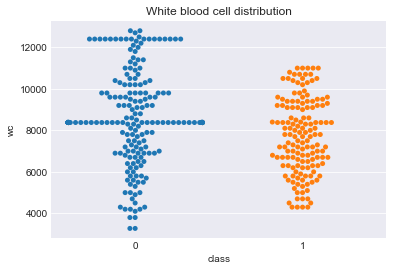

In [211]:
## DISTRIBUTION OF NUMERICAL DATA IN TERMS OF TARGET VARIABLE:

sns.swarmplot(y=df['wc'],x=df['class']).set(title='White blood cell distribution')

# to know if the affected person has high white blood cell count or less blood cell count

###### The above plot shows that the white blood cell count is relatively similar in both the categories . Hence white blood cells doesnt have much impact on the target variable.


[Text(0.5, 1.0, 'Hemoglobin distribution')]

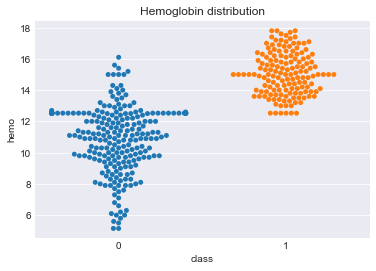

In [212]:
sns.swarmplot(y=df['hemo'],x=df['class']).set(title='Hemoglobin distribution')

###### The above swarm plot shows that the patient who got affected by the chronic kidney disease have high haemoglobin count and it does have a good impact on the target variable.

[Text(0.5, 1.0, 'Sodium level distribution')]

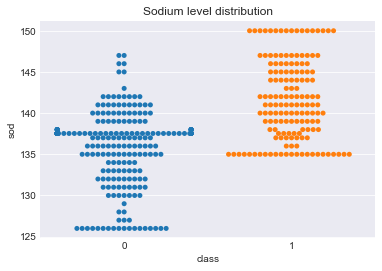

In [213]:
sns.swarmplot(y=df['sod'],x=df['class']).set(title='Sodium level distribution')

# have to add for pcv and rc

###### The above swarm plot shows that the patient who got affected by the chronic kidney diseases have relatively higher that values ranges from (0.82 to 0.92)

In [214]:
#Let's get to know about affected patients and unaffected patients.

yes = df[df['class']==1]
no  = df[df['class']==0]
print(yes.shape)
print(no.shape)

(150, 20)
(250, 20)


In [215]:
# persons of which age are mostly affected

yes.groupby('age')['age'].count().sort_values(ascending=False).head(10)

age
47.0    6
30.0    6
55.0    6
44.0    5
33.0    5
43.0    5
23.0    4
60.0    4
34.0    4
35.0    4
Name: age, dtype: int64

In [216]:
no.groupby('age')['age'].count().sort_values(ascending=False).head(10)

age
65.000    15
60.000    15
9.000     10
48.000     9
54.000     9
50.000     9
62.000     8
59.000     8
51.483     8
61.000     7
Name: age, dtype: int64

In [217]:
print(yes.age.mean())
print(no.age.mean())

46.549886666666666
54.57945600000001


Age is not only a factor for affecting the disease, it depends on several other factors & by this dataset, we infer that the average age of unaffected people is 55 and affected people is 46.

In [218]:
yes.groupby('sg')['sg'].count().head()

sg
1.020    80
1.025    70
Name: sg, dtype: int64

In [219]:
no.groupby('sg')['sg'].count().sort_values(ascending=False).head(10)

sg
1.010    84
1.015    75
1.020    73
1.025    11
1.005     7
Name: sg, dtype: int64

Mostly people with 1.020 and 1.025 specific gravity are affected with the disease. There are rare cases for not getting affected.

In [220]:
yes.groupby('hemo')['hemo'].count().sort_values(ascending=False).head(15)

hemo
15.000    12
12.526     6
13.600     6
13.900     5
14.800     5
17.000     4
15.800     4
15.500     4
14.000     4
15.400     4
13.800     3
15.200     3
16.500     3
16.400     3
16.300     3
Name: hemo, dtype: int64

In [221]:
no.groupby('hemo')['hemo'].count().sort_values(ascending=False).head(15)

hemo
12.526    46
10.900     8
9.800      7
11.100     7
11.300     6
12.000     6
10.300     6
9.700      5
10.000     5
10.800     5
11.200     5
7.900      5
12.600     5
12.200     4
12.500     4
Name: hemo, dtype: int64

People with haemoglobin more than 12 are mostly affected.

Text(0.5, 0.98, 'RED BLOOD CELLS')

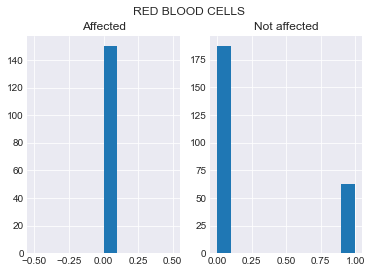

In [222]:
plt.subplot(1,2,1)
yes['rbc'].hist()
plt.title('Affected')

plt.subplot(1,2,2)
no['rbc'].hist()
plt.title('Not affected')

plt.suptitle('RED BLOOD CELLS')

People with red blood cells count nearer to one are not affected and people with rbc count nearer to 0 can either be affected or not, which shows there are few other attributes to determine whether they are affected or not.

In [223]:
X = df.drop('class',axis=1)
y = df['class'].astype(int)

[0.01092714 0.02123832 0.20227745 0.10909452 0.00834329 0.03101192
 0.04064016 0.00406555 0.00093435 0.02987968 0.03548113 0.00868017
 0.1430628  0.00502305 0.21172164 0.00415995 0.06967263 0.04230651
 0.02147976]


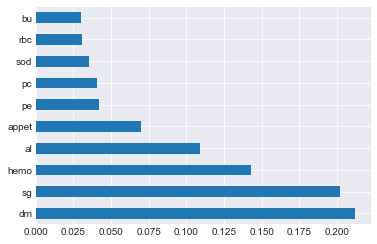

In [224]:
model = ExtraTreesClassifier(random_state=820)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [225]:
ft = feat_importances.nlargest(10).index

In [226]:
ft.tolist()

['dm', 'sg', 'hemo', 'al', 'appet', 'pe', 'pc', 'sod', 'rbc', 'bu']

In [227]:
X_selected=df[ft]

##### Machine learning modeling

**Grid Search CV**

In [228]:
model_params = {
    'logistic_regression' : {
        'model' : LogisticRegression(random_state=8),
        'params' : {
            'C' : [1,5,10]
        }
    },
    
    'decision_tree' : {
        'model' : DecisionTreeClassifier(random_state=21),
        'params' : {
            'max_depth' : [5,10,15],
            'max_leaf_nodes' : [5,10,15]
        }
    },
    
    'random_forest' : {
        'model' : RandomForestClassifier(random_state=20),
        'params' : {
            'n_estimators' : [50,100,150],
            'criterion' : ['entropy','gini']
        }
    },
    
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [3,5,7],
            'weights' : ['uniform','distance']
        }
    }
    }   

In [229]:
scores = []

for model_name, mp in model_params.items():
    
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    grid.fit(X_selected, y)
    scores.append({
        'model' : model_name,
        'best_score' : grid.best_score_,
        'best_params' : grid.best_params_
    })

In [230]:
pd.DataFrame(scores)

,model,best_score,best_params
0,logistic_regression,0.9525,{'C': 10}
1,decision_tree,0.9775,"{'max_depth': 5, 'max_leaf_nodes': 10}"
2,random_forest,0.9925,"{'criterion': 'entropy', 'n_estimators': 100}"
3,knn,0.9175,"{'n_neighbors': 3, 'weights': 'distance'}"


###### The random forest model shows highest accuracy! We can use that for prediction

In [231]:
X_selected

,dm,sg,hemo,al,appet,pe,pc,sod,rbc,bu
294,1.0,1.020,14.3,0.0,0.0,1.0,0.0,135.0,0.0,50.0
288,1.0,1.025,15.9,0.0,0.0,1.0,0.0,135.0,0.0,46.0
297,1.0,1.025,15.8,0.0,0.0,1.0,0.0,146.0,0.0,26.0
290,1.0,1.020,14.8,0.0,0.0,1.0,0.0,146.0,0.0,28.0
300,1.0,1.020,15.0,0.0,0.0,1.0,0.0,141.0,0.0,26.0
...,...,...,...,...,...,...,...,...,...,...
395,1.0,1.020,15.7,0.0,0.0,1.0,0.0,150.0,0.0,49.0
396,1.0,1.025,16.5,0.0,0.0,1.0,0.0,141.0,0.0,31.0
397,1.0,1.020,15.8,0.0,0.0,1.0,0.0,137.0,0.0,26.0
398,1.0,1.025,14.2,0.0,0.0,1.0,0.0,135.0,0.0,50.0


In [232]:
#*hemo in type box*
#*dm yes or no*
#*sg as it is*
#*al* [0,1,2,3,4,5]
#*appet [0,1,2,3,4,5]
#*sod [135 to 150]
#*bu in type box
#*pc in [0,1] (normal or abnormal)
##*rbc in as it it.(normal or abnormal)
#*pe in yes or no.

In [233]:
X_selected.columns

Index(['dm', 'sg', 'hemo', 'al', 'appet', 'pe', 'pc', 'sod', 'rbc', 'bu'], dtype='object')

In [234]:
##jus fitting the model
rf_1= RandomForestClassifier(criterion='entropy',n_estimators=30,random_state=23)
rf_1.fit(X_selected,y)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=23)

In [ ]:
root = Tk()

root.geometry("800x600")
root.title("KIDNEY DISEASE DIAGNOSIS")
root.configure(bg="ivory")
global Name
global Age

def submit():
    Name = name1.get()
    Age = age.get()
    Gender = clicked1.get()
    hemo_1=hemo1.get()
    dm=clicked3.get()
    dm_val = 0 if dm =='YES' else 1
    sg=clicked4.get()
    al=clicked5.get()
    appet=clicked6.get()
    pe=clicked7.get()
    pe_val = 0 if pe =='YES' else 1
    sod=clicked8.get()
    pc=clicked9.get()
    pc_val = 0 if dm =='NORMAL' else 1
    rbc=clicked10.get()
    rbc_val = 0 if dm =='NORMAL' else 1
    bu_1=bu1.get()
    
    new_input = [[hemo_1,dm_val,float(sg),al,appet,pe_val,sod,bu_1,pc_val,rbc_val]]
    y_pred = rf_1.predict(new_input)
    print(y_pred)
    
    if(y_pred==1):
        Label20 = Label(root,text="RESULT: AFFECTED BY KIDNEY DISEASE",font="times 12 bold")
        Label20.grid(row=13,column=3)
    if(y_pred==0):
        Label21= Label(root,text="RESULT: NOT AFFECTED BY KIDNEY DISEASE",font="times 12 bold")
        Label21.grid(row=13,column=3)

#CREATING LABEL
Label1 = Label(root, text="Kidney Disease Diagnosis", font="none 14 bold")
Label1.grid(row=0,column=1)

Label2 = Label(root, text="ENTER PATIENT NAME")
Label2.grid(row=1, column=0)

Label3 = Label(root, text="ENTER PATIENT AGE")
Label3.grid(row=2, column=0)

Label4 = Label(root, text="ENTER PATIENT GENDER")
Label4.grid(row=3,column=0)

Label5 = Label(root, text="HEMOGLOBIN LEVEL")
Label5.grid(row=4, column=0)

Label6 = Label(root, text="PRESENCE OF DIABETES MELLITUS")
Label6.grid(row=5, column=0)

Label7 = Label(root, text="SPECIFIC GRAVITY LEVEL")
Label7.grid(row=6,column=0)

Label8 = Label(root, text="ALUMINIUM ")
Label8.grid(row=7, column=0)

Label9 = Label(root, text="APPETITE")
Label9.grid(row=8, column=0)

Label10 = Label(root, text="PRESENCE OF PEDAL EDEMA")
Label10.grid(row=9,column=0)

Label11 = Label(root, text="SODIUM LEVEL")
Label11.grid(row=10, column=0)

Label12 = Label(root, text="BLOOD UREA LEVEL")
Label12.grid(row=11, column=0)

Label14 = Label(root, text="PRESENCE OF PUS CELL")
Label14.grid(row=12, column=0)

Label15 = Label(root, text="RED BLOOD CELL LEVEL")
Label15.grid(row=13, column=0)

options1=[0,1]
options2=['MALE','FEMALE','OTHER']
options3=[0,1,2,3,4,5]
options4=['YES','NO']
options5 = [1.005,1.010,1.015,1.020,1.025]
options6= [i for i in range(135,151)]
options7=['NORMAL','ABNORMAL']

clicked1 = StringVar()
clicked1.set(options2[0])

drop1 = OptionMenu(root, clicked1, *options2)
drop1.grid(row=3,column=1,pady=3, padx=40)

clicked3 = StringVar()
clicked3.set(options4[0])

drop3 = OptionMenu(root, clicked3, *options4)
drop3.grid(row=5,column=1,pady=3, padx=40)

clicked4 = StringVar()
clicked4.set(options5[0])

drop4 = OptionMenu(root, clicked4, *options5)
drop4.grid(row=6,column=1,pady=3, padx=40)

clicked5 = IntVar()
clicked5.set(options3[0])

drop5 = OptionMenu(root, clicked5, *options3)
drop5.grid(row=7,column=1,pady=3, padx=40)

clicked6 = IntVar()
clicked6.set(options3[0])

drop6 = OptionMenu(root, clicked6, *options3)
drop6.grid(row=8,column=1,pady=3, padx=40)

clicked7 = StringVar()
clicked7.set(options4[0])

drop7 = OptionMenu(root, clicked7, *options4)
drop7.grid(row=9,column=1,pady=3, padx=40)

clicked8 = IntVar()
clicked8.set(options6[0])

drop8 = OptionMenu(root, clicked8, *options6)
drop8.grid(row=10,column=1,pady=3, padx=40)

clicked9 = StringVar()
clicked9.set(options7[0])

drop9 = OptionMenu(root, clicked9, *options7)
drop9.grid(row=12,column=1,pady=3, padx=40)

clicked10 = StringVar()
clicked10.set(options7[0])

drop10 = OptionMenu(root, clicked10, *options7)
drop10.grid(row=13,column=1,pady=3, padx=40)

name1 = Entry(root,width=60,borderwidth=10)
name1.grid(row=1,column=1,padx=50,pady=20)

age = Entry(root,width=60,borderwidth=10)
age.grid(row=2,column=1,padx=50,pady=20)

hemo_1=DoubleVar()
bu_1=DoubleVar()

hemo1 = Entry(root,width=60,textvariable=hemo_1,borderwidth=10)
hemo1.grid(row=4,column=1,padx=50,pady=20)

bu1 = Entry(root,width=60,textvariable=bu_1,borderwidth=10)
bu1.grid(row=11,column=1,padx=50,pady=20)

submit = Button(root, text="CHECK RESULT",command=submit)
submit.grid(row=12,column=3,padx=50,pady=20)

root.mainloop()

[0]


<b>From the observed four models we found Random Forest Classifier as the best model with the parameters 'criterion' : 'gini' and n_estimators : 50 for its high accuracy and efficiency.</b>
<b>It has yielded an accuracy of 99.25% and a Graphical User Interface is built to make an interactive page to predict whether the person is affected or not.</b>